In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings ('ignore')

In [3]:
dfm = pd.read_csv(r'C:\Users\Kiran\Documents\jupyter notebook\Movies India codsoft.csv', encoding='ISO-8859-1')
dfm

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
attribute = dfm.columns
print (attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [6]:
dfm.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
dfm.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [8]:
dfm.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
dfm.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [10]:
df_shape = dfm.shape

print(f"Number of rows: {df_shape[0]}, Number of columns: {df_shape[1]}")

Number of rows: 15509, Number of columns: 10


In [11]:
unique_genres = dfm['Genre'].unique()

print("Unique Genres:", unique_genres)

Unique Genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family,

In [12]:
rating_dist = dfm [ 'Rating'].value_counts()
print("Rating Distribution: \n", rating_dist)

Rating Distribution: 
 Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64


In [13]:
dfm.drop_duplicates (inplace = True)

In [14]:
attributes = ['Name', 'Year', 'Duration', 'Votes', 'Rating']
dfm.dropna (subset = attributes, inplace = True)
missing_val= dfm.isna().sum()
print (missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [15]:
movie_name_rating = dfm [['Name', 'Rating']]
print (movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


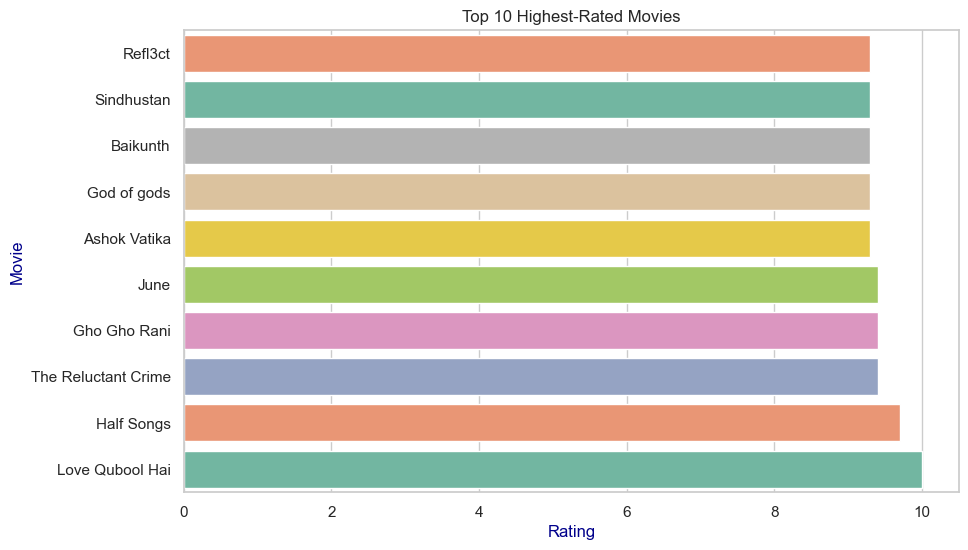

In [38]:
top_rated_movies = dfm.sort_values(by='Rating', ascending=False).head(10)
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Name', data=top_rated_movies, palette='Set2')
plt.xlabel('Rating', color='darkblue')
plt.ylabel('Movie', color='darkblue')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show()


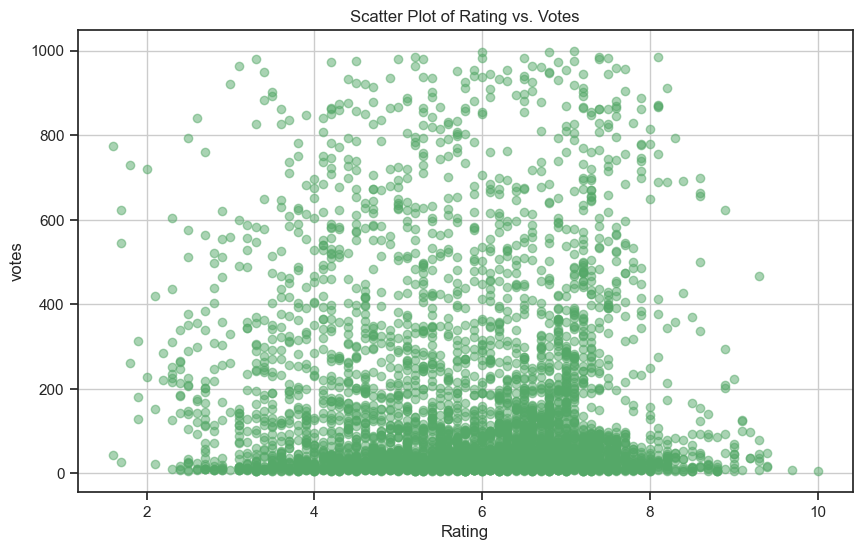

In [30]:
dfm [ 'Votes'] = pd.to_numeric (dfm [ 'Votes'], errors = 'coerce')
plt.figure(figsize = (10, 6))
plt.scatter (dfm ['Rating'], dfm ['Votes'], alpha=0.5, color = 'g')
plt.xlabel('Rating')
plt.ylabel('votes')
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid (True)
plt.show()


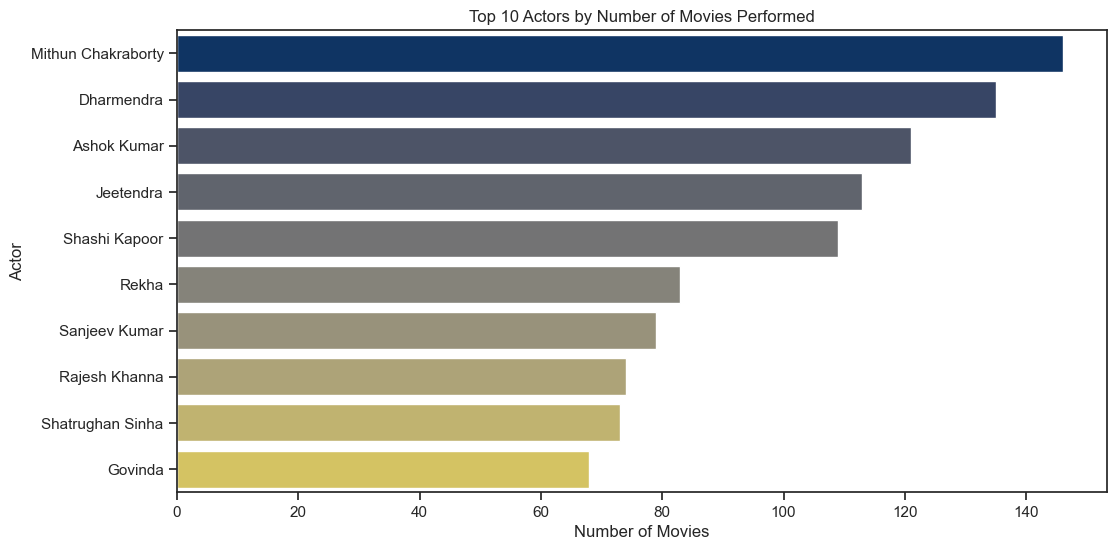

In [31]:
actors = pd.concat([dfm ['Actor 1'], dfm ['Actor 2'], dfm ['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns= ['Actor', 'Number of Movies']
plt.figure(figsize = (12, 6))
sns.barplot (x = 'Number of Movies', y = 'Actor', data = actor_counts.head(10), palette = 'cividis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

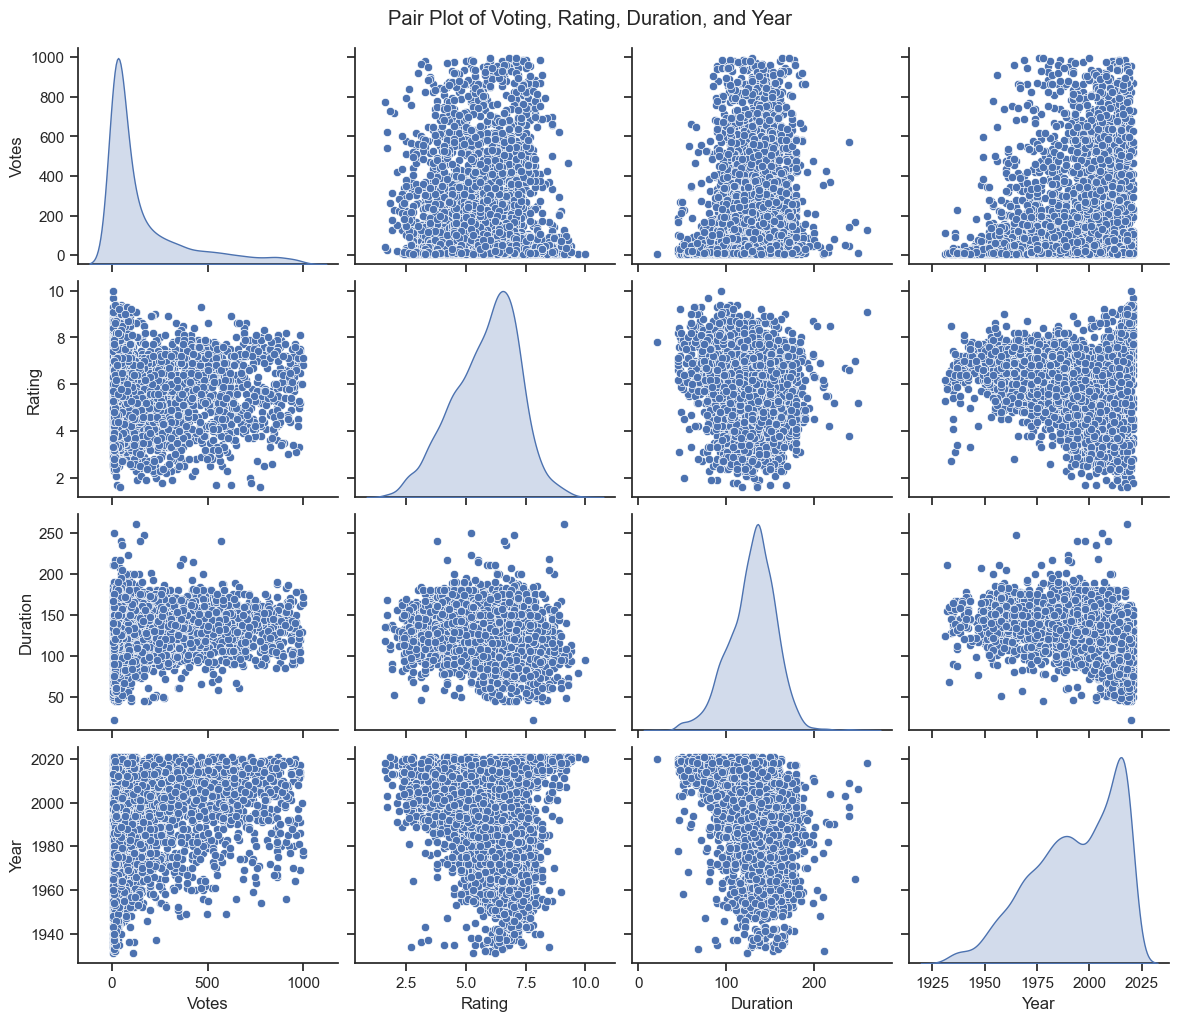

In [33]:
columns_of_interest = ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style= 'ticks')
sns.pairplot(dfm[columns_of_interest], diag_kind='kde', markers='o', palette='magma', height=2.5, aspect=1.2)
plt.suptitle('Pair Plot of Voting, Rating, Duration, and Year', y = 1.02)
plt.show()

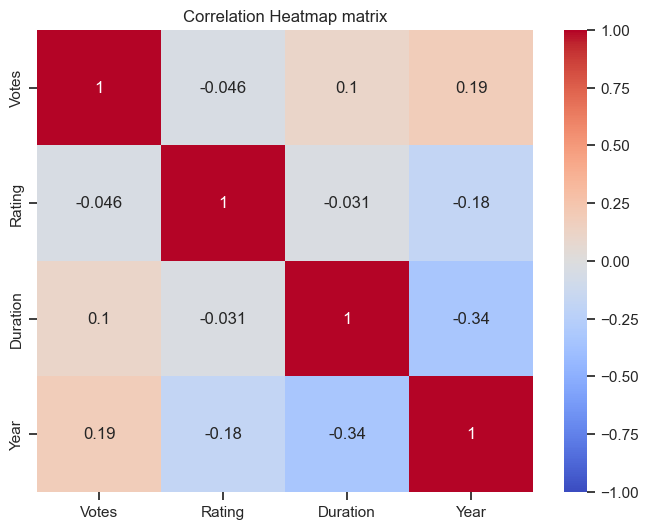

In [20]:
 dfm['Duration'] = dfm['Duration'].str.extract('(\d+)').astype(float)
dfm['Year'] = dfm['Year'].str.extract('(\d+)').astype(float)
no_columns= ['Votes', 'Rating', 'Duration', 'Year']
correlation_matrix = dfm [no_columns].corr()
plt.figure(figsize = (8, 6)) 
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap matrix')
plt.show()

In [21]:
dataset_sorted = dfm.sort_values(by = 'Votes', ascending = False)
dataset_sorted["Vote_Count_Percentile"] = dataset_sorted["Votes"] .rank(pct = True)*100
dataset_sorted.reset_index(drop = True, inplace = True)
print (dataset_sorted[['Name', 'Votes', 'Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [22]:
dfm = dfm.dropna(subset = ['Votes'])

In [23]:
dfm.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [24]:
dfm['Year'] = dfm['Year'].astype(str) 
dfm['Duration'] = dfm['Duration' ].astype(str)
dfm['Year'] = dfm['Year'].str.extract('(\d+)').astype(float)
dfm['Duration'] = dfm['Duration' ].str.extract('(\d+)').astype(float)
X = dfm[['Year','Duration', 'Votes']] 
y = dfm['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared R2 Score: {r2}")

Mean Absolute Error: 1.0848311387601357
Root Mean Squared Error: 1.3484226346477912
R-squared R2 Score: 0.0981216384029091


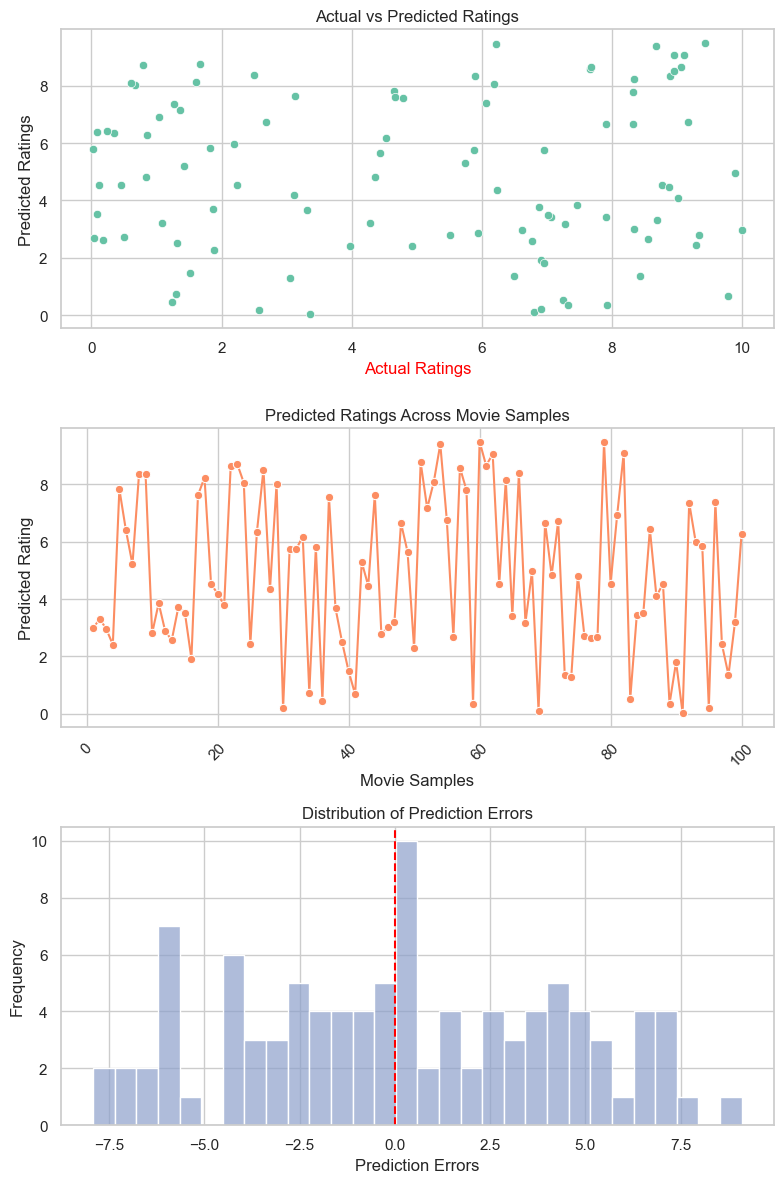

In [39]:
y_test = np.random.rand(100) * 10  
y_pred = np.random.rand(100) * 10  
errors = y_test - y_pred

sns.set(style='whitegrid')
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

sns.scatterplot(x=y_test, y=y_pred, color=sns.color_palette('Set2')[0], ax=axs[0])
axs[0].set_xlabel('Actual Ratings', color='red')
axs[0].set_ylabel('Predicted Ratings')
axs[0].set_title('Actual vs Predicted Ratings')

movie_samples = np.arange(1, len(y_pred) + 1)
sns.lineplot(x=movie_samples, y=y_pred, marker='o', linestyle='-', color=sns.color_palette('Set2')[1], ax=axs[1])
axs[1].set_xlabel('Movie Samples')
axs[1].set_ylabel('Predicted Rating')
axs[1].set_title('Predicted Ratings Across Movie Samples')
axs[1].tick_params(axis='x', rotation=45)

sns.histplot(errors, bins=30, color=sns.color_palette('Set2')[2], alpha=0.7, ax=axs[2])
axs[2].set_xlabel('Prediction Errors')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Prediction Errors')
axs[2].axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()


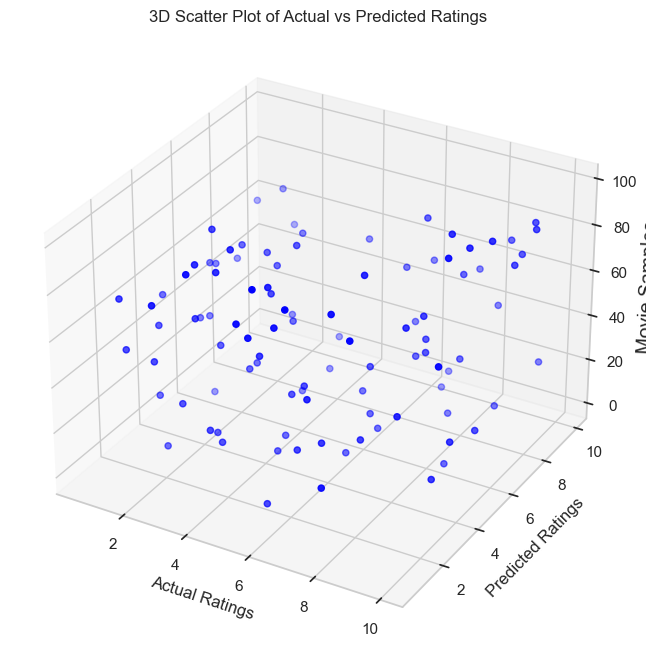

In [47]:
from mpl_toolkits.mplot3d import Axes3D

y_test = np.random.rand(100) * 10  
y_pred = np.random.rand(100) * 10  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_test, y_pred, range(len(y_test)), c='blue', marker='o')

ax.set_xlabel('Actual Ratings',fontsize=12)
ax.set_ylabel('Predicted Ratings',fontsize=12)
ax.set_zlabel('Movie Samples',fontsize=14)
ax.set_title('3D Scatter Plot of Actual vs Predicted Ratings')

plt.show()
